## PS3 for MACS30150
### Dr. Evans
#### Submitted by Junho Choi

This is .ipynb file for PS3 containing answers and codes to questions 5.9 through 5.22.

### Exercise 5.9

In the below section, I have used *numpy*'s *linspace* to generate vector $W$ that contains 100 elements from 0.01 to 1, evenly spaced (with increments of 0.01).

In [717]:
import numpy as np

In [718]:
N = 100
W_max, W_min = 1, 0.01
W = np.linspace(W_min, W_max, N)
print(W)

[ 0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12
  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24
  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35  0.36
  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48
  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.6
  0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71  0.72
  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83  0.84
  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95  0.96
  0.97  0.98  0.99  1.  ]


### Exercise 5.10

Using (5.9) from Evans (2019, p. 49), we can characterize the problem for $t=T+1$ as follows:

\begin{equation}
V_{T}(W) \equiv C(V_{T+1}(W)) \equiv \max_{W'\in [0, W]}u(W-W')+\beta V_{T+1}(W')
\end{equation}

which is equivalent to (5.34) on Evans (2019, p. 68) as expectedly. We now follow the steps in Section 5.9 of Evans (2019, pp. 68-69). First, in the below section, I generate all the possible combinations of $W-W'$ (denoted *W_Wp*)that will be used in the future steps. Note that for $W$ and $W'$, I will use the vector created in Exercise 5.9.

In [745]:
W_possibles = np.tile(W.reshape((N, 1)), (1, N))
print(W_possibles)
print()
W_Wp = W_possibles - W_possibles.transpose()
print(W_Wp)

[[ 0.01  0.01  0.01 ...,  0.01  0.01  0.01]
 [ 0.02  0.02  0.02 ...,  0.02  0.02  0.02]
 [ 0.03  0.03  0.03 ...,  0.03  0.03  0.03]
 ..., 
 [ 0.98  0.98  0.98 ...,  0.98  0.98  0.98]
 [ 0.99  0.99  0.99 ...,  0.99  0.99  0.99]
 [ 1.    1.    1.   ...,  1.    1.    1.  ]]

[[ 0.   -0.01 -0.02 ..., -0.97 -0.98 -0.99]
 [ 0.01  0.   -0.01 ..., -0.96 -0.97 -0.98]
 [ 0.02  0.01  0.   ..., -0.95 -0.96 -0.97]
 ..., 
 [ 0.97  0.96  0.95 ...,  0.   -0.01 -0.02]
 [ 0.98  0.97  0.96 ...,  0.01  0.   -0.01]
 [ 0.99  0.98  0.97 ...,  0.02  0.01  0.  ]]


Notice that in the above matrix (in numpy array form), there are nonpositive values. On such values, the natural logarithm function will be undefined; therefore, we switch such numbers with a very small positive number; Evans (2019, p. 70) suggests $10^{-10}$, and this is what I will use.

In [746]:
verysmallpos = 10 ** (-10)
nonpos = W_Wp <= 0
W_Wp[nonpos] = verysmallpos

We know that, as the question itself has elaborated, $V_{T+1}(W')$ is a column vector of $N$ zeroes. Therefore, the maximization problem will not need to take the part $\beta V_{T+1}(W')$ into consideration. Just in case, however, I create the vector *vTp1* (representing $V_{T+1}(W')$) in the below section. 

In [721]:
vTp1 = np.array([0] * N)

I define the function *ln_w_np* below to evaluate natural logarithms. Note that since natural logarithms are undefined over nonpositive values, they will take the output of a very large negative number; Evans (2019, p. 70) suggests the use of $-10^{10}$, and I will use this.

In [722]:
from numpy import log as ln
import math
from matplotlib import pyplot as plt

In [762]:
verylargeneg = (-1) * (10 ** 10)

def ln_w_np(xval):
    try:
        rtnval = ln(xval)
    except ValueError:
        rtnval = verylargeneg
    return rtnval

In [763]:
verylargeneg / 10000

-1000000.0

Let us now define a (rather trivial) function that will give us the utility function (denoted *Ufn*). But $u(\cdot) = \ln(\cdot)$, so we can write the following.

In [724]:
def Ufn(mat):
    return ln_w_np(mat)

Then *W_Wp* evaluated by the utility function will be as follows:

In [725]:
U = Ufn(W_Wp)
print("Dimensions are:", U.shape)
print(U)

Dimensions are: (100, 100)
[[ -2.30258509e+01  -2.30258509e+01  -2.30258509e+01 ...,  -2.30258509e+01
   -2.30258509e+01  -2.30258509e+01]
 [ -4.60517019e+00  -2.30258509e+01  -2.30258509e+01 ...,  -2.30258509e+01
   -2.30258509e+01  -2.30258509e+01]
 [ -3.91202301e+00  -4.60517019e+00  -2.30258509e+01 ...,  -2.30258509e+01
   -2.30258509e+01  -2.30258509e+01]
 ..., 
 [ -3.04592075e-02  -4.08219945e-02  -5.12932944e-02 ...,  -2.30258509e+01
   -2.30258509e+01  -2.30258509e+01]
 [ -2.02027073e-02  -3.04592075e-02  -4.08219945e-02 ...,  -4.60517019e+00
   -2.30258509e+01  -2.30258509e+01]
 [ -1.00503359e-02  -2.02027073e-02  -3.04592075e-02 ...,  -3.91202301e+00
   -4.60517019e+00  -2.30258509e+01]]


We now maximize over the rows (which is the direction that $W'$ took), and the result will be what is represented in *vT*; this will be the result of evaluating $W$ with the value function $V_T$ (i.e. $V_T(W)$). The $W'$ values that returned the maxima to calculate the value function is the policy function $\psi_T$ evaluated at $W$ (i.e. $W' = \psi_T(W)$); this will be represented in *pT*. Notice that as there should be no cake transferred to period $T+1$, $W'$ takes the smallest value possible, which is 0.01 for our configurations.

To promote future uses, we define function *valpol* for calculating value and policy function approximations. This will take the matrix of possible values of $W-W'$ (which is W_Wp in our case), $V(W')$, and $\beta$ value initialized to be $0.9$. Note that the upper triangular part of the overall matrix (i.e. $U(W-W')+\beta V(W')$) is where $W-W'$ is negative, and so it should only return the smallest $W'$ possible (0.01 in our case). Therefore, they are punished with a large negative number; in my case, I have put in $-1,000,000$.

In [895]:
def valpol(W_Wp, VW, beta=0.9):
    
    ## evaluating utility function
    U = Ufn(W_Wp)
    
    ## repeating VW N times
    VW_mat = np.tile(VW, (N, 1))
    
    ## should not account for W-W' that is negative, so do this
    ## putting in verylargeneg produced errors; try this instead
    VW_mat[nonpos] = verylargeneg / 10000

    ## contraction
    contraction = U + (beta * VW_mat)
    
    ## value function evaluation, one more iteration
    ## note that W' was on the columns, so axis=1
    VW_iter = contraction.max(axis=1)
    
    ## policy function evaluation, one more iteration
    polidx = np.argmax(contraction, axis=1)
    pol_iter = W[polidx]
    
    return VW_iter, pol_iter, polidx

Using the above function, $V_T(W')$ and $W'=\psi_T(W)$ can be found as follows; their graphs are presented below.

In [897]:
## value and policy at T
vT, pT, a = valpol(W_Wp, vTp1)
a.shape

(100,)

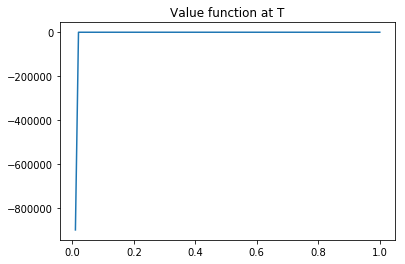

In [766]:
## value at T
plt.plot(W,vT)
plt.title("Value function at T")
plt.show()

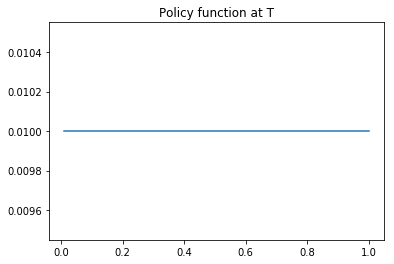

In [767]:
## policy at T
plt.plot(W,pT)
plt.title("Policy function at T")
plt.show()

### Exercise 5.11

In the below section, I define function *norm_val_fns* to calculate the sum of squared differences for $V_t(W)$ and $V_{t+1}(W')$. The said function requires 2 inputs, *v* and *v_plus_1* to indicate $V_t(W)$ and $V_{t+1}(W')$ (in lists or numpy arrays).

In [768]:
def norm_val_fns(v1, v2):
    
    err_msg = "v1 and v2 should be of the same length"
    assert len(v1) == len(v2), err_msg
    
    if type(v1) == list:
        v1 = np.array(v1)

    if type(v2) == list:
        v2 = np.array(v2)
    
    v1_2 = v1 - v2
    mult = v1_2 * v1_2
    
    return np.sum(mult)

Using the above function, $\delta_T$ can be calculated as $\delta_T \approx 8.1 \times 10^{11}$. Note that the large distance is most likely due to punishing the upper triangle part of the matrix with a negative number with very large absolute value (i.e. $-1,000,000$.)

In [769]:
d_T = norm_val_fns(vT, vTp1)
print('delta_T :', d_T)

delta_T : 810041447241.0


### Exercise 5.12

Using *valpol* and the past value for value function approximation at time $T$, we can calculate $V_{T-1}$ and $\psi_{T-1}$ as follows.

In [770]:
vTm1, pTm1 = valpol(W_Wp, vT)

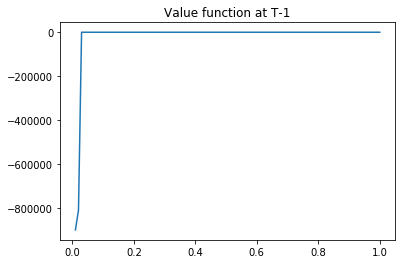

In [771]:
## value at T-1
plt.plot(W,vTm1)
plt.title("Value function at T-1")
plt.show()

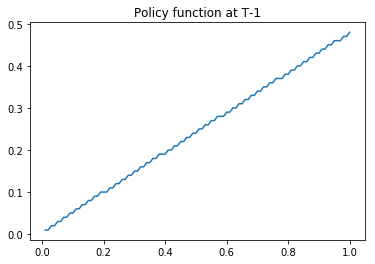

In [773]:
## policy at T-1
plt.plot(W,pTm1)
plt.title("Policy function at T-1")
plt.show()

Distance $\delta_{T-1}\approx 6.6\times 10^{11}$ has decreased slightly than before ($\delta_T \approx 8.1 \times 10^{11}$).

In [774]:
d_Tm1 = norm_val_fns(vTm1, vT)
print('delta_(T-1) :', d_Tm1)

delta_(T-1) : 656133572636.0


### Exercise 5.13

Once again, we can calculate the value and policy function evaluations at $T-2$ (i.e. $V_{T-2}$ and $\psi_{T-2}$) as follows.

In [788]:
vTm2, pTm2 = valpol(W_Wp, vTm1)

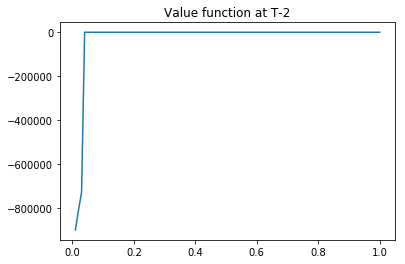

In [790]:
## value at T-2
plt.plot(W,vTm2)
plt.title("Value function at T-2")
plt.show()

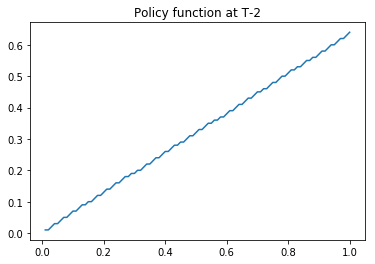

In [792]:
## policy at T-2
plt.plot(W,pTm2)
plt.title("Policy function at T-2")
plt.show()

Distance $\delta_{T-2}\approx 5.3\times10^{11}$ has decreased in comparison to $\delta_{T-1}\approx 6.6\times 10^{11}$ and $\delta_{T}\approx 8.1 \times 10^{11}$. Let us further iterate to see (or fail to see) convergence.

In [793]:
d_Tm2 = norm_val_fns(vTm2, vTm1)
print('delta_(T-2) :', d_Tm2)

delta_(T-2) : 531468194013.0


### Exercise 5.14

In the below function *dynprog*, I reiterate the step-by-step contraction mapping over and over again until the distance is small enough that the system converges. I use the value of $10^{-9}$ for the distance that is "small enough."

In [784]:
small = 1e-9

def dynprog(W_Wp, V, beta=0.9):
    W_l = W_Wp.shape[0]
    Wp_l = W_Wp.shape[1]
    
    err_msg = "Dimensions should be the same"
    assert W_l == Wp_l and Wp_l == len(V), err_msg
    
    s = 1
    inputV = V
    d = small + 1
    
    while d >= small:
        opener = "Iteration "+str(s)+":"
        newV, newP = valpol(W_Wp, inputV, beta)
        d = norm_val_fns(newV, inputV)
        print(opener, "distance =", d)
        inputV = newV
        s += 1
        
    print("-------------------")
    print("Success at iteration "+str(s-1)+":", "distance =", d)
    
    return newV, newP

In the below section, we see that it takes 101 iterations to complete the entire contraction operation.

In [785]:
val_cvg, pol_cvg = dynprog(W_minus_W_prime, val_Tp1)

Iteration 1: distance = 810041447241.0
Iteration 2: distance = 656133572636.0
Iteration 3: distance = 531468194013.0
Iteration 4: distance = 430489237261.0
Iteration 5: distance = 348696282256.0
Iteration 6: distance = 282443988679.0
Iteration 7: distance = 228779630868.0
Iteration 8: distance = 185311501031.0
Iteration 9: distance = 150102315856.0
Iteration 10: distance = 121582875859.0
Iteration 11: distance = 98482129458.5
Iteration 12: distance = 79770524871.2
Iteration 13: distance = 64614125153.5
Iteration 14: distance = 52337441380.7
Iteration 15: distance = 42393327523.6
Iteration 16: distance = 34338595298.4
Iteration 17: distance = 27814262195.4
Iteration 18: distance = 22529552381.4
Iteration 19: distance = 18248937431.8
Iteration 20: distance = 14781639322.2
Iteration 21: distance = 11973127853.1
Iteration 22: distance = 9698233563.05
Iteration 23: distance = 7855569187.98
Iteration 24: distance = 6363011044.08
Iteration 25: distance = 5154038947.42
Iteration 26: distance =

### Exercise 5.15

We can plot the converged policy function as follows.

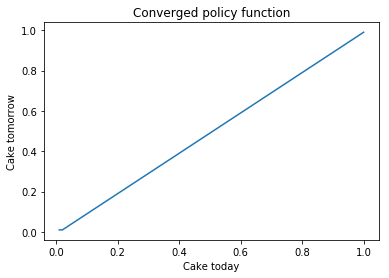

In [798]:
plt.plot(W, pol_cvg)
plt.title("Converged policy function")
plt.xlabel("Cake today")
plt.ylabel("Cake tomorrow")
plt.show()

### Exercise 5.16

For this exercise, I borrow the *ncNormal* function that I have created in the previous problem set for the creation of vectors $\epsilon$ and $\Gamma(\epsilon)$. Note that we set the parameters first in the section directly below.

In [521]:
M = 7
sigma = 0.5
mu = sigma * 4
k = 3

In [527]:
from scipy.stats import norm as nr
import numpy as np
import math

def ncNormal(mu, sig, N, k):
    '''
    Given mean and standard deviation of a normal distribution, along with
    the number of nodes (to be equally spaced) and number of standard
    deviations to be away from the mean, returns vector of weights and
    vector of nodes for Newton-Cotes quadrature method.
    
    input:
    mu: mean of the normal distribution
    sig: standard deviation of the normal distribution
    N: number of nodes
    k: number of standard deviations to be away from the mean
    
    output:
    tuple (double) containing
    - vector of nodes
    - vector of weights
    
    '''
    
    # Lower and upper bounds (i.e. furthest nodes)
    lb, ub = mu - sig*k, mu + sig*k
    
    weights = []
    
    nodes = np.linspace(lb, ub, N)
    case_1 = nr.cdf((nodes[0] + nodes[1]) / 2, mu, sig)
    case_N = 1 - nr.cdf((nodes[-1] + nodes[-2]) / 2, mu, sig)
    
    for i in range(1, N+1):
        if i == 1:
            weights.append(case_1)
        elif i == N:
            weights.append(case_N)
        else:
            now = nodes[i-1]
            fwd, bwd = nodes[i], nodes[i-2]
            z_min = (bwd + now) / 2
            z_max = (fwd + now) / 2
            weights.append(nr.cdf(z_max, mu, sig) - nr.cdf(z_min, mu, sig))
            
    return np.array(nodes), np.array(weights)

In [528]:
e_vec, gamma_vec = ncNormal(mu, sigma, 7, 3)

In [801]:
print(e_vec)
print()
print(gamma_vec)
print("Checking sum to 1:", np.sum(gamma_vec)==1)

[ 0.5  1.   1.5  2.   2.5  3.   3.5]

[ 0.00620967  0.06059754  0.24173034  0.38292492  0.24173034  0.06059754
  0.00620967]
Checking sum to 1: True


### Exercise 5.17

Let us first generate the $7\times100$ (for convenience's sake) zero matrix for $V_{T+1}(W',\epsilon')$.

In [926]:
VeTp1 = [0] * N
VeTp1 = [VeTp1] * M
VeTp1 = np.array(VeTp1)
VeTp1.shape

(7, 100)

The below section defines function *eU* which will return the $\epsilon u(W-W')$ values (in matrix of dimensions $7\times 100 \times 100$, for convenience's sake), given matrix of $W-W'$ values and a vector of $\epsilon$s. Note that $u(\cdot) = \ln(\cdot)$.

In [919]:
def eU(W_Wp, evec):
    
    eUmat = []
    
    ## eUmat should result in dimensions x: N y: M z: N
    for e in evec:
        interm = e * ln_w_np(W_Wp)
        eUmat.append(interm)
    
    return np.array(eUmat)

The below section defines $EV$ which will return $\mathbb{E}_{\epsilon'}[V(W', \epsilon')]$ values (in vector of length $100$), given $V(W', \epsilon')$ (denoted *V* below), $\beta$, and the probabilities over $\epsilon'$ which is $\Gamma(\epsilon')$.

In [936]:
def EV(V, probs, beta=0.9):
    
    EVvec = []
    
    ## each row is across different values of epsilon
    ## for a certain value of W'
    for i in range(N):
        column = V[:, i]
        Expec = np.sum(column * probs)
        EVvec.append(Expec)
        
    return np.array(EVvec)

The below section will transform the vector of $\mathbb{E}_{\epsilon'}[V(W', \epsilon')]$ values into a 3-dimensional array for the sake of calculation. Note that the upper triangle part of each "slice" across axis with $\epsilon$ (with dimensions $100\times 100$) should be punished with a negative number with large absolute value (in our case, $-1,000,000$ again) as such values are where $W-W'$ takes a nonpositive value.

In [937]:
def EV_to_cube(EV):
    
    EV_cube = []
    for i in range(M):
        EV_slice = []
        for j in range(N):
            EV_slice.append(EV)
        EV_slice = np.array(EV_slice)
        EV_slice[nonpos] = verylargeneg / 10000
        EV_cube.append(EV_slice)
    
    return np.array(EV_cube)

Now, the below function *eU_bEV* and *vp_stoch* will combine the above process and produce the matrices of value functions and policy functions. 

In [942]:
def eU_bEV(eU_cube, EV_cube, beta=0.9):
    
    entire = eU_cube + beta * EV_cube
    
    Vprimes = []
    Wprimes = []
    for i in range(M):
        contraction_e = entire[i]
        val_iter = contraction_e.max(axis=1)
        polidx = np.argmax(contraction_e, axis=1)
        pol_iter = W[polidx]
        Vprimes.append(val_iter)
        Wprimes.append(pol_iter)
        
    return np.array(Vprimes), np.array(Wprimes)

In [943]:
def vp_stoch(W_Wp, VWe, evec, probs, beta=0.9):
    
    eUcube = eU(W_Wp, evec)
    EVvec = EV(VWe, probs)
    EVcube = EV_to_cube(EVvec)
    
    return eU_bEV(eUcube, EVcube)

We can then calculate $V_T(W,\epsilon)$ and $\psi_T(W, \epsilon)$ as follows.

In [945]:
VeT, PeT = vp_stoch(W_Wp, VeTp1, e_vec, gamma_vec)

Let us plot the value function and policy function (at $\epsilon = \mu= 2$) for period $T$.

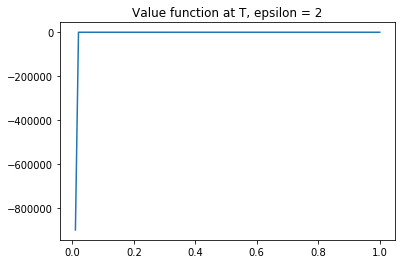

In [946]:
## value at T, epsilon = 2
plt.plot(W,VeT[3])
plt.title("Value function at T, epsilon = 2")
plt.show()

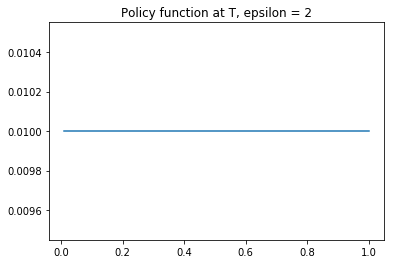

In [947]:
## policy at T, epsilon = 2
plt.plot(W,PeT[3])
plt.title("Policy function at T, epsilon = 2")
plt.show()

### Exercise 5.18

First I define the function *vectorize* to vectorize a matrix as its name strongly hints.

In [948]:
def vectorize(mat):
    mat = mat.transpose()
    vector = []
    for row in mat:
        vector += list(row)
        
    return np.array(vector)

Next I define the function *norm_val_stoch* which vectorizes and finds the corresponding norm for two matrices.

In [949]:
def norm_val_stoch(v_T, v_Tp1):
    
    err_msg = "The two inputs must have the same dimensions"
    assert v_T.shape == v_Tp1.shape, err_msg
    
    if type(v_T) == list:
        v_T = np.array(v_T)

    if type(v_Tp1) == list:
        v_Tp1 = np.array(v_Tp1)
    
    vecT = vectorize(v_T)
    vecTp1 = vectorize(v_Tp1)
    
    vec_diff = vecT - vecTp1
    mult_vec = vec_diff * vec_diff
    
    return np.sum(mult_vec)

Then, using these functions, $\delta_T$ can be found as follows; $\delta_T \approx 5.671\times10^{12}$.

In [950]:
d_T = norm_val_stoch(VeT, VeTp1)
print(d_T)

5.67058027626e+12


### Exercise 5.19

We have generated $V_{T-1}$ and $\psi_{T-1}$ as follows, and let us plot them for $\epsilon = \mu = 2$.

In [951]:
VeTm1, PeTm1 = vp_stoch(W_Wp, VeT, e_vec, gamma_vec)

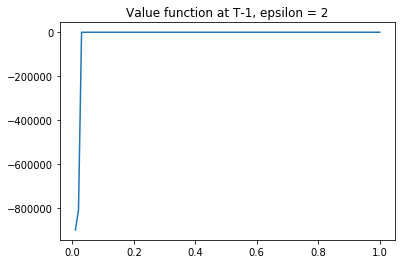

In [952]:
## value at T-1, epsilon = 2
plt.plot(W,VeTm1[3])
plt.title("Value function at T-1, epsilon = 2")
plt.show()

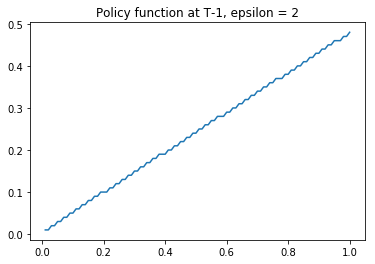

In [953]:
## policy at T-1, epsilon = 2
plt.plot(W,PeTm1[3])
plt.title("Policy function at T-1, epsilon = 2")
plt.show()

We then find $\delta_{T-1} \approx 5.667\times10^{12}$, which is smaller than $\delta_T \approx 5.671\times10^{12}$.

In [954]:
d_Tm1 = norm_val_stoch(VWe_Tm1, VWe_T)
print(d_Tm1)

5.66731540908e+12


### Exercise 5.20

Again, we apply the functions above to find $V_{T-2}$ and $\psi_{T-2}$; let us again plot them for $\epsilon = \mu = 2$.

In [955]:
VeTm2, PeTm2 = vp_stoch(W_Wp, VeTm1, e_vec, gamma_vec)

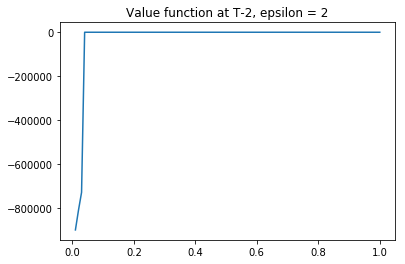

In [958]:
## value at T-2, epsilon = 2
plt.plot(W,VeTm2[3])
plt.title("Value function at T-2, epsilon = 2")
plt.show()

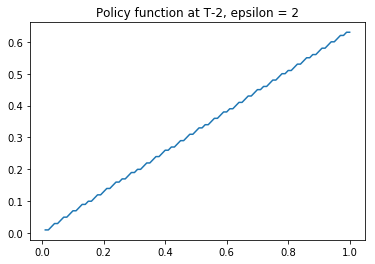

In [957]:
## policy at T-2, epsilon = 2
plt.plot(W,PeTm2[3])
plt.title("Policy function at T-2, epsilon = 2")
plt.show()

We find $\delta_{T-2} \approx 3.720\times10^{12}$, which is smaller than $\delta_{T-1} \approx 5.667\times10^{12}$ and smaller than $\delta_T \approx 5.671\times10^{12}$.

In [959]:
d_Tm2 = norm_val_stoch(VeTm2, VeTm1)
print(d_Tm2)

3.72046772907e+12


### Exercise 5.21

Let us then use the function *dynprog_stoch* as described below to find whether the system converges or not, and how many iterations it requires if it does so.

In [963]:
small = 1e-9

def dynprog_stoch(W_Wp, VWe, evec, probs, beta=0.9):
    W_l = W_Wp.shape[0]
    Wp_l = W_Wp.shape[1]
    V_l = VWe.shape[1]
    
    err_msg = "Dimensions should be the same"
    assert W_l == Wp_l and Wp_l == V_l, err_msg
    
    s = 1
    inputVWe = VWe
    d = small + 1
    
    while d >= small:
        opener = "Iteration "+str(s)+":"
        newVWe, newPWe = vp_stoch(W_Wp, inputVWe, evec, probs)
        d = norm_val_stoch(newVWe, inputVWe)
        print(opener, "distance =", d)
        inputVWe = newVWe
        s += 1
        
    print("-------------------")
    print("Success at iteration "+str(s-1)+":", "distance =", d)
    
    return newVWe, newPWe

In [965]:
val_cvg, pol_cvg = dynprog_stoch(W_Wp, VeTp1, e_vec, gamma_vec)

Iteration 1: distance = 5.67058027626e+12
Iteration 2: distance = 4.59317002971e+12
Iteration 3: distance = 3.72046772907e+12
Iteration 4: distance = 3.01357886362e+12
Iteration 5: distance = 2.44099888159e+12
Iteration 6: distance = 1.97720909554e+12
Iteration 7: distance = 1.60153936844e+12
Iteration 8: distance = 1.29724688922e+12
Iteration 9: distance = 1.05076998086e+12
Iteration 10: distance = 851123684949.0
Iteration 11: distance = 689410185163.0
Iteration 12: distance = 558422250263.0
Iteration 13: distance = 452322022938.0
Iteration 14: distance = 366380838763.0
Iteration 15: distance = 296768479550.0
Iteration 16: distance = 240382468563.0
Iteration 17: distance = 194709799644.0
Iteration 18: distance = 157714937806.0
Iteration 19: distance = 127749099705.0
Iteration 20: distance = 103476770835.0
Iteration 21: distance = 83816184443.5
Iteration 22: distance = 67891109461.0
Iteration 23: distance = 54991798721.0
Iteration 24: distance = 44543357018.2
Iteration 25: distance = 3

The above process shows that it took 101 iterations for convergence.

### Exercise 5.22

Let us plot the 3-D graph as requested:

In [330]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [966]:
X = W
Y = e_vec
X, Y = np.meshgrid(X, Y)
Z = pol_cvg

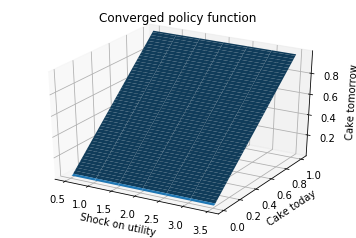

In [969]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y, X, Z)
ax.set_title("Converged policy function")
ax.set_zlabel("Cake tomorrow")
ax.set_ylabel("Cake today")
ax.set_xlabel("Shock on utility")
plt.show()